In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import patches as mpatches
import pandas as pd
import seaborn as sns
import numpy as np
import gseapy as gp
import re
from sequencing_tools.viz_tools import okabeito_palette, color_encoder, simpsons_palette

def label_sample(x):
    if 'HS' in x:
        return 'High salt'
    elif 'Frag' in x:
        return 'Fragmented'
    elif re.search('N[aA]', x):
        return 'Alkaline hydrolysis'
    elif re.search('L[12]',x):
        return 'PolyA-selected'
    elif re.search('Exo|ED|DE', x):
        return 'Exonuclease I'
    elif 'All' in x:
        return 'Untreated'
    else:
        return 'Unfragmented'

plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize =15)
plt.rc('ytick', labelsize = 15)
colors = okabeito_palette()
colors.append('black')

In [29]:
project_path = '/stor/work/Lambowitz/cdw2854/cell_Free_nucleotides/tgirt_map'
count_file = project_path + '/Counts/combined_gene_count.tsv'
#    .assign(grouped_type = lambda d: np.where(d.name.str.startswith('MT-'), 'MT', d.grouped_type))\


count_df = pd.read_table(count_file) \
    .assign(grouped_type = lambda d: np.where(d.grouped_type == "rDNA", 'rRNA', d.grouped_type))
count_df.head()

,id,grouped_type,type,name,200FN_1_S3_R1_001,200FQ_1_S4_R1_001,200NDP_1_S5_R1_001,200ND_1_S6_R1_001,200ND_2_S7_R1_001,200NH_1_S8_R1_001,...,Qcf_HS3_R1_001,Qcf_L1_R1_001,Qcf_L2_R1_001,Qcf_NA2_R1_001,Qcf_Na1_R1_001,S96_cfD_R1_001,S96_cf_R1_001,TEV1_R1_001,TEV2_R1_001,TEV3_R1_001
0,18S_rRNA,rRNA,rDNA,18S_rRNA,626746.5,795566.0,206622.5,70107.0,161960.5,150410.5,...,39686.5,1146.5,824.5,1031.0,1017.0,52537.0,56353.0,250239.5,1029894.5,2059.0
1,28S_rRNA,rRNA,rDNA,28S_rRNA,1318143.5,1338619.0,523739.0,152026.5,350603.0,321675.5,...,84998.0,7028.0,9547.0,1990.0,2179.0,138153.5,147707.5,531385.5,1640763.5,2320.5
2,5.8S_rRNA,rRNA,rDNA,5.8S_rRNA,58194.5,55894.0,36639.5,92652.5,222217.5,171202.5,...,55166.0,192.0,96.0,121.5,159.5,181095.5,193164.0,500432.5,90813.0,30.5
3,5S_rRNA,rRNA,rDNA,5S_rRNA,24427.5,81433.5,13364.5,11100.5,32791.5,27038.0,...,7249.0,133.5,37.5,57.5,85.5,1679.5,1774.5,18994.0,26173.0,6.0
4,ENSG00000000003,Protein coding,protein_coding,TSPAN6,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
count_df.columns

Index(['id', 'grouped_type', 'type', 'name', '200FN_1_S3_R1_001',
       '200FQ_1_S4_R1_001', '200NDP_1_S5_R1_001', '200ND_1_S6_R1_001',
       '200ND_2_S7_R1_001', '200NH_1_S8_R1_001', '200NIIIP_1_S1_R1_001',
       '200NIII_1_S9_R1_001', '200NIP_1_S10_R1_001', '200NI_1_S11_R1_001',
       '200PND_1_S12_R1_001', '200PNIII_1_S16_R1_001', '200PNI_1_S13_R1_001',
       '200_H_2_S10_R1_001', '200_H_S3_R1_001', '200_III_2_S9_R1_001',
       '200_III_S2_R1_001', '200_I_2_S6_R1_001', '200_I_3_S8_R1_001',
       '200_I_S1_R1_001', '200_NT_2_S5_R1_001', '200_NT_3_S7_R1_001',
       '200_NT_S5_R1_001', '200_PI_1_S11_R1_001', '450FPN_1_S14_R1_001',
       '450_NT_1_S4_R1_001', '450_NT_2_S6_R1_001', 'IGG_cf_R1_001',
       'NN2_R1_001', 'NQ1_R1_001', 'NQ2_R1_001', 'ON1_R1_001', 'ON2_R1_001',
       'OQ1_R1_001', 'QCF1_R1_001', 'QCF2_R1_001', 'Qcf10_R1_001',
       'Qcf4_R1_001', 'Qcf5_R1_001', 'Qcf6_SS_R1_001', 'Qcf7_R1_001',
       'Qcf8_R1_001', 'Qcf9_R1_001', 'Qcf_All1_R1_001', 'Qcf_DE1_R1_001

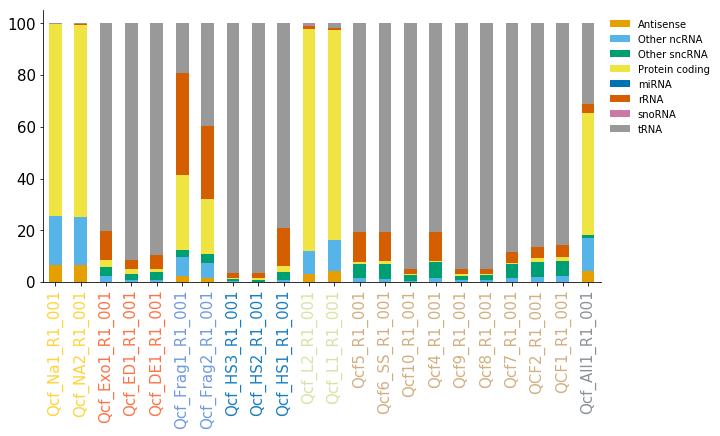

In [31]:
def percentage_columns(d):
    for col in d.columns:
        d[col] = d[col].transform(lambda x: 100*x/x.sum())
    return d

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)
bar_df = count_df.drop(['id','type','name'], axis=1)\
    .filter(regex = 'grouped|Q[cC][fF]')\
    .groupby('grouped_type')\
    .sum() \
    .pipe(percentage_columns)\
    .transpose() \
    .assign(treatment = lambda d: d.index.map(label_sample))
    
bar_df.sort_values('treatment')\
    .drop('treatment', axis=1)\
    .plot.bar(stacked=True, ax = ax, color = colors)
ax.legend(bbox_to_anchor = (1,1), frameon = False)

ce = color_encoder()
ce.fit_transform(bar_df.treatment, simpsons_palette())
for xt in ax.get_xmajorticklabels():
    color = ce.encoder[label_sample(xt.get_text())]
    xt.set_color(color)
sns.despine()

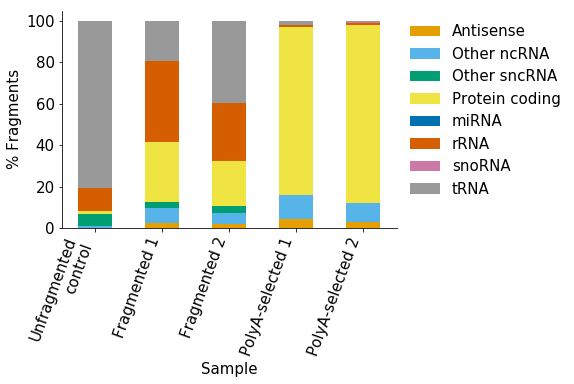

In [32]:
def rename_longRNA(name):
    try:
        x = name.split('_')[1]
        treatment = ''
    
        is_long = 0
        if 'Frag' in x:
            treatment = 'Fragmented'
            is_long = 1
        elif re.search('L[12]', x):
            treatment = 'PolyA-selected'
            is_long = 1
        elif re.search('Qcf[0-9]+|SS',name):
            treatment = 'Unfragmented\ncontrol'
            is_long = 0
    
        if is_long == 1:
            return treatment +' ' + re.search('\d+', x).group(0)
        else:
            return treatment 
    except IndexError:
        return name
        

fig = plt.figure()
ax = fig.add_subplot(111)
count_df\
    .filter(regex = 'grouped|L[12]|Frag|SS')\
    .groupby('grouped_type')\
    .sum() \
    .pipe(percentage_columns)\
    .rename(columns = rename_longRNA)\
    .transpose() \
    .plot.bar(stacked=True, ax = ax, color = colors)
ax.legend(bbox_to_anchor = (1,1), frameon = False, fontsize=15)
ax.set_xlabel('Sample')
ax.set_ylabel('% Fragments')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, ha = 'right')
sns.despine()

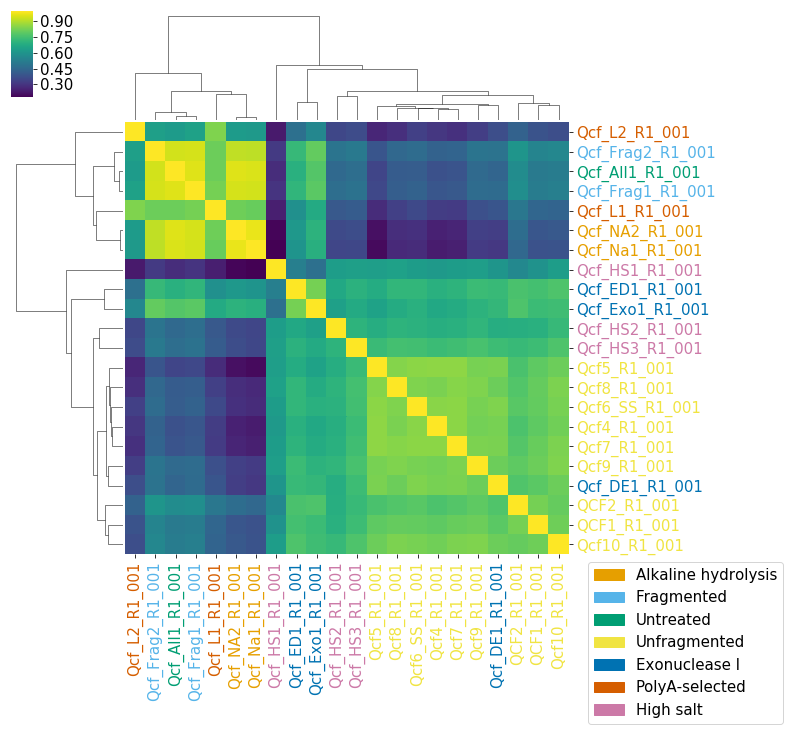

In [33]:
cor_df = np.log(count_df.filter(regex = 'Qcf|QCF')+1).corr()
p = sns.clustermap(cor_df, cmap = 'viridis')
ax = p.ax_heatmap
xt = ax.set_xticks(range(cor_df.shape[0]))
yt = ax.set_yticks(range(cor_df.shape[1]))
xt = ax.set_xticklabels(cor_df.columns[p.dendrogram_col.reordered_ind])
yt = ax.set_yticklabels(cor_df.index[p.dendrogram_row.reordered_ind])

yt = ax.set_yticks(np.arange(cor_df.shape[1])+0.5)
xt = ax.set_xticks(np.arange(cor_df.shape[0])+0.5)

ce = color_encoder()
ce.fit(cor_df.columns.map(label_sample), 
                 okabeito_palette())
for xt in ax.get_xmajorticklabels():
    color = ce.encoder[label_sample(xt.get_text())]
    xt.set_color(color)
    
for yt in ax.get_ymajorticklabels():
    color = ce.encoder[label_sample(yt.get_text())]
    yt.set_color(color)

pat = [mpatches.Patch(color=col, label=lab) for lab, col in ce.encoder.items()]
ax.legend(handles=pat, bbox_to_anchor = (1.5,0.), fontsize=15)

In [106]:
def count_to_tpm(count, length):
    rate = count/length
    tpm = rate/rate.sum() * 1e6 
    return tpm

gene_length = pd.read_table('/stor/work/Lambowitz/ref/hg19/genome/genes.length', 
                            names = ['id','glength'])
gene_length.head()

tpm_df = count_df\
    .filter(regex='id|grouped_type|type|name|L[12]|Frag|FQ') \
    .assign(id = lambda d: d.id.str.split('.', expand=True).iloc[:,0])\
    .merge(gene_length)
for col in tpm_df.columns:
    if 'Qcf' in col:
        tpm_df[col] = count_to_tpm(tpm_df[col], tpm_df['glength'])

In [107]:
gene_expr = '/stor/work/Lambowitz/cdw2854/EV_polyA/published_expr/rna_tissue.tsv'
expr_df = pd.read_table(gene_expr)
expr_df.head()

,Gene,Gene name,Sample,Value,Unit
0,ENSG00000000003,TSPAN6,adipose tissue,31.5,TPM
1,ENSG00000000003,TSPAN6,adrenal gland,26.4,TPM
2,ENSG00000000003,TSPAN6,appendix,9.2,TPM
3,ENSG00000000003,TSPAN6,bone marrow,0.7,TPM
4,ENSG00000000003,TSPAN6,breast,53.4,TPM


In [108]:
top_n = 80
tpm_cor_df = tpm_df\
    .filter(regex='id|Qcf')\
    .rename(columns = {'id':'Gene'})
cor_df = expr_df\
    .pipe(pd.pivot_table, columns = 'Sample', 
          index=['Gene'], values='Value') \
    .reset_index() \
    .merge(tpm_cor_df, on ='Gene', how ='inner')\
    .sort_values('Qcf_L1_R1_001', ascending=False)\
    .iloc[:, 1:]\
    .transform(lambda x: np.log(x+1))\
    .corr(method = 'pearson')\
    .filter(regex = 'Qcf|Frag') \
    .reset_index() \
    .pipe(lambda d: d[~d['index'].str.contains('Qcf')])\
    .sort_values('Qcf_L1_R1_001', ascending=False)\
    .head(top_n)
cor_df.index = cor_df['index']
cor_df

,index,Qcf_Frag1_R1_001,Qcf_Frag2_R1_001,Qcf_L1_R1_001,Qcf_L2_R1_001
index,,,,,
bone marrow,bone marrow,0.101739,0.106771,0.334922,0.358511
lymph node,lymph node,0.075652,0.083989,0.301822,0.320198
spleen,spleen,0.081895,0.089443,0.301021,0.319653
appendix,appendix,0.080262,0.089422,0.298242,0.317101
tonsil,tonsil,0.076893,0.086716,0.295569,0.311870
salivary gland,salivary gland,0.113737,0.120505,0.290476,0.316573
colon,colon,0.090251,0.100883,0.284198,0.306646
adipose tissue,adipose tissue,0.090078,0.099424,0.283471,0.301475
urinary bladder,urinary bladder,0.076466,0.086386,0.280454,0.296487


Text(1,0.6,"Spearman's $\\rho$")

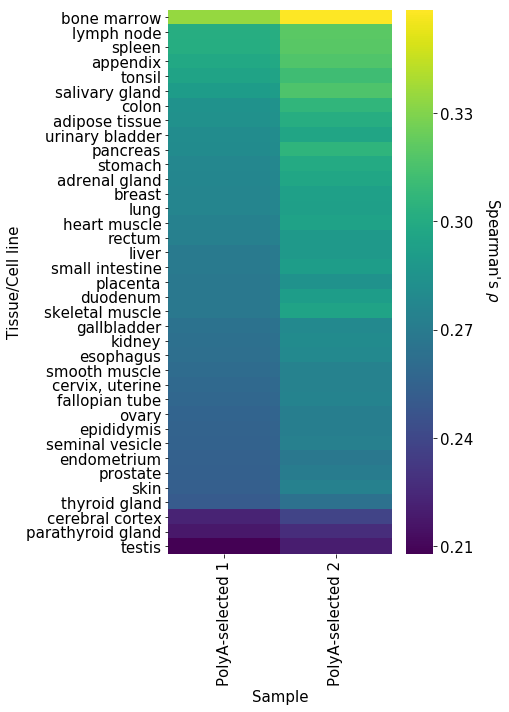

In [109]:
fig = plt.figure(figsize = (5,10))
ax = fig.add_subplot(111)
sns.heatmap(cor_df.filter(regex = 'L[12]').rename(columns = rename_longRNA),
           cmap = 'viridis', ax = ax)
ax.set_xlabel('Sample')
ax.set_ylabel('Tissue/Cell line')
yt = ax.set_yticks(np.arange(cor_df.shape[0])+0.5)
yt = ax.set_yticklabels(cor_df['index'].values, fontsize=15)
fig.text(1,0.6, r"Spearman's $\rho$", rotation = 270, fontsize=15)

Text(0.08,0.85,"Spearman's $\\rho$")

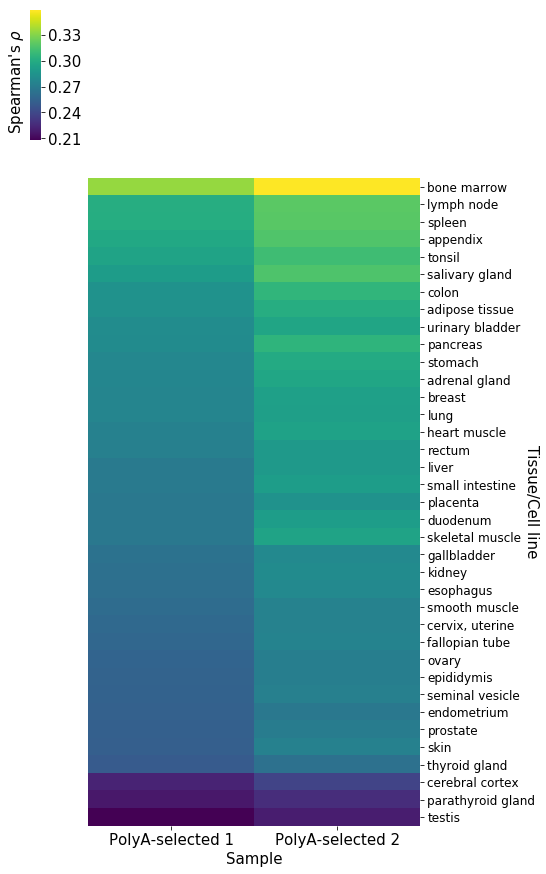

In [110]:
p = sns.clustermap(cor_df.filter(regex = 'L[12]').rename(columns = rename_longRNA),
                row_cluster=False,
                col_cluster=False,
               cmap = 'viridis',
               figsize = (7,15))
ax = p.ax_heatmap
yt = ax.set_yticks(np.arange(cor_df.shape[0])+0.5)
yt = ax.set_yticklabels(cor_df['index'].values, fontsize=12)#[p.dendrogram_row.reordered_ind])
ax.set_xlabel('Sample')
ax.set_ylabel('Tissue/Cell line', rotation=270)
p.fig.text(0.08,0.85, r"Spearman's $\rho$", rotation = 90, fontsize=15)

In [111]:
tpm_df.head()

,id,grouped_type,type,name,200FQ_1_S4_R1_001,Qcf_Frag1_R1_001,Qcf_Frag2_R1_001,Qcf_L1_R1_001,Qcf_L2_R1_001,glength
0,18S_rRNA,rRNA,rDNA,18S_rRNA,795566.0,24968.189088,11415.340977,1091.350347,730.295424,1870
1,28S_rRNA,rRNA,rDNA,28S_rRNA,1338619.0,15363.449444,6402.681476,2485.136683,3141.255323,5034
2,5S_rRNA,rRNA,rDNA,5S_rRNA,81433.5,31148.749043,15652.758902,1980.303513,517.606293,120
3,ENSG00000000003,Protein coding,protein_coding,TSPAN6,0.0,0.000000,0.000000,0.000000,0.000000,11321
4,ENSG00000000003,Protein coding,protein_coding,TSPAN6,0.0,0.110885,0.037477,0.471703,0.146307,11321


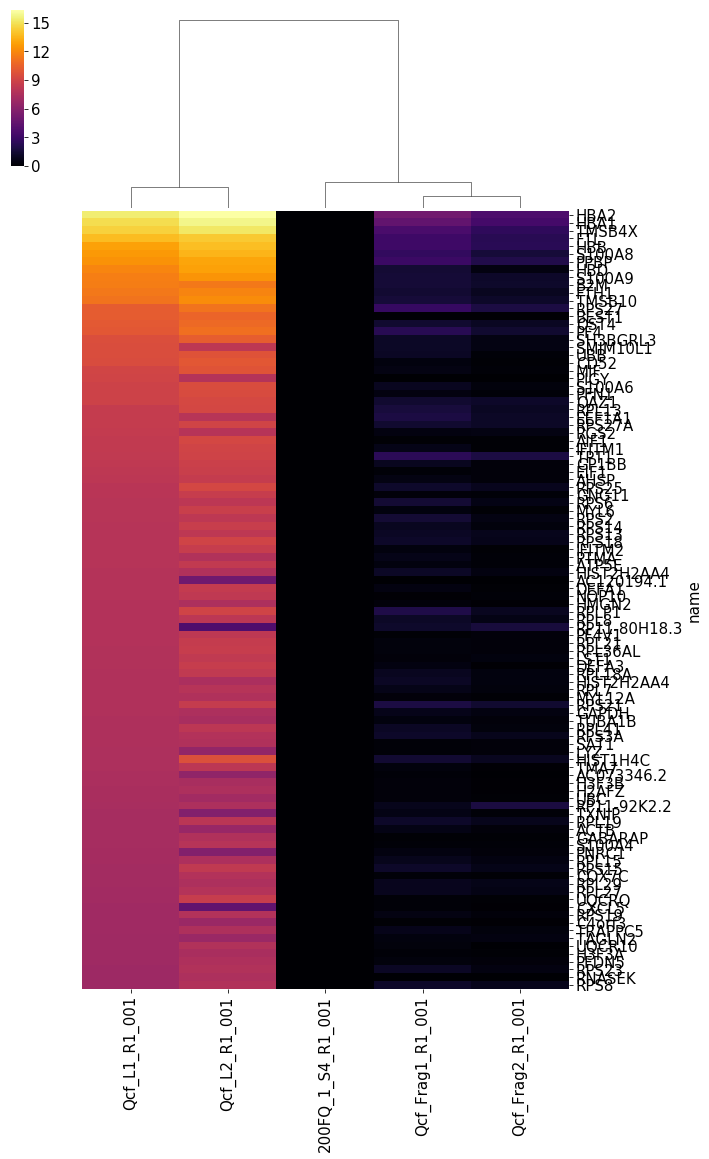

In [112]:
top_n = 100
hd = tpm_df\
    .sort_values('Qcf_L1_R1_001', ascending=False)\
    .query('type == "protein_coding"')\
    .pipe(lambda d: d[~d.name.str.contains('^MT')])
hd.index = hd.name

p = sns.clustermap(np.log2(hd\
                           .head(top_n)\
                           .filter(regex = 'Q')+1),
              row_cluster=False,
              cmap='inferno',
              figsize = (10,18))
ax = p.ax_heatmap
yt = ax.set_yticks(np.arange(top_n) +0.5)
yt = ax.set_yticklabels(hd.index[:top_n])

In [120]:
samplename = 'Qcf_L1_R1_001'

tpm_df = count_df\
    .assign(id = lambda d: d.id.str.split('.', expand=True).iloc[:,0])\
    .filter(regex='id|grouped_type|type|name|L[12]|Frag|FQ') \
    .merge(gene_length) \
    .query('type == "protein_coding"')
for col in tpm_df.columns:
    if 'Qcf' in col:
        tpm_df[col] = count_to_tpm(tpm_df[col], tpm_df['glength'])
tpm_df.sort_values('Qcf_L1_R1_001', ascending=False).head()


rank_df = expr_df\
    .pipe(lambda d: d[np.in1d(d.Sample, ['bone marrow', 'lymph node', 'spleen'])])\
    .rename(columns = {'Gene':'id',
                       'Gene name':'name'})\
    .groupby(['id','name'], as_index=False)\
    .agg({'Value':'mean'})\
    .filter(['id','name','Value'])\
    .merge(hd\
            .loc[:,['id','name',samplename]],
          on = ['id','name']) \
    .assign(rank = lambda d: d[samplename].rank() - d['Value'].rank()) \
    .sort_values('rank', ascending=False)
rank_df.head(20)

,id,name,Value,Qcf_L1_R1_001,rank
36323,ENSG00000255072,PIGY,0.0,535.662623,34890.0
36918,ENSG00000267697,LUZP6,0.0,70.797368,34751.0
11508,ENSG00000127530,OR7C1,0.0,26.742507,34515.0
34133,ENSG00000206106,KRTAP22-2,0.0,24.384221,34476.0
28260,ENSG00000180934,OR56A1,0.0,21.626753,34428.0
17672,ENSG00000148826,NKX6-2,0.0,21.207880,34422.0
24804,ENSG00000170790,OR10A2,0.0,20.304731,34401.0
36320,ENSG00000255012,OR5M1,0.0,16.917036,34342.0
34861,ENSG00000221836,OR2A5,0.0,14.071526,34245.5
34875,ENSG00000221858,OR2A12,0.0,13.627163,34224.0


In [121]:
cor_df = expr_df\
    .pipe(pd.pivot_table, columns = 'Sample', 
          index=['Gene', 'Gene name'], values='Value') \
    .reset_index() \
    .pipe(lambda d: d[~d['Gene name'].str.contains('^MT')])\
    .merge(tpm_cor_df.rename(columns=rename_longRNA), on ='Gene', how ='inner') \
    .sort_values('PolyA-selected 1', ascending=False)
cor_df.index= cor_df['Gene name']
cor_df.head(10)

,Gene,Gene name,adipose tissue,adrenal gland,appendix,bone marrow,breast,cerebral cortex,"cervix, uterine",colon,...,spleen,stomach,testis,thyroid gland,tonsil,urinary bladder,Fragmented 1,Fragmented 2,PolyA-selected 1,PolyA-selected 2
Gene name,,,,,,,,,,,,,,,,,,,,,
HBA2,ENSG00000188536,HBA2,226.0,336.7,218.0,18369.0,213.0,59.0,73.2,78.2,...,427.2,32.4,13.3,55.4,8.2,28.5,35.042834,12.400074,44288.751849,81302.693609
HBA1,ENSG00000206172,HBA1,142.9,233.6,143.1,17119.3,110.9,48.3,34.8,58.1,...,303.5,20.4,9.4,35.4,3.9,17.1,22.769911,9.518007,30258.703662,58310.254596
TMSB4X,ENSG00000205542,TMSB4X,3805.9,5439.9,6688.8,5468.2,3675.2,2891.0,4421.5,4173.9,...,10744.7,4224.3,928.3,1529.5,6487.7,5915.7,11.202025,4.983406,23427.919545,39133.869281
FTL,ENSG00000087086,FTL,4755.5,2291.2,3208.8,2600.5,2719.6,1997.8,2925.6,2081.9,...,5838.2,1280.3,889.4,2427.0,1209.1,3753.2,7.743124,4.035629,14176.045728,19066.292026
HBB,ENSG00000244734,HBB,627.5,654.3,306.3,78046.6,854.1,85.0,283.8,266.8,...,720.7,48.9,30.1,456.2,37.1,180.5,7.751261,4.257303,7684.862971,14799.616130
S100A8,ENSG00000143546,S100A8,464.5,22.0,1232.5,14915.7,36.9,11.7,176.7,25.4,...,786.1,10.9,13.0,12.6,4867.3,166.9,5.429615,2.120580,6365.673749,11782.080410
PPBP,ENSG00000163736,PPBP,2.3,1.4,1.6,110.6,1.1,0.5,0.1,0.2,...,24.3,0.1,0.0,1.6,0.0,0.7,7.187925,3.172637,5363.182029,8187.379336
HBD,ENSG00000223609,HBD,0.1,0.3,0.7,1221.3,0.0,0.0,0.0,0.4,...,2.2,0.2,0.1,0.1,0.1,0.1,1.865270,0.420286,3878.150861,7793.781771
S100A9,ENSG00000163220,S100A9,794.0,53.5,2087.4,20959.3,51.3,20.9,255.9,42.7,...,1188.6,17.2,16.6,29.3,3911.6,1006.1,1.942173,1.277726,3272.303996,5607.439572


Text(0.1,0.85,'TPM ($log_2$)')

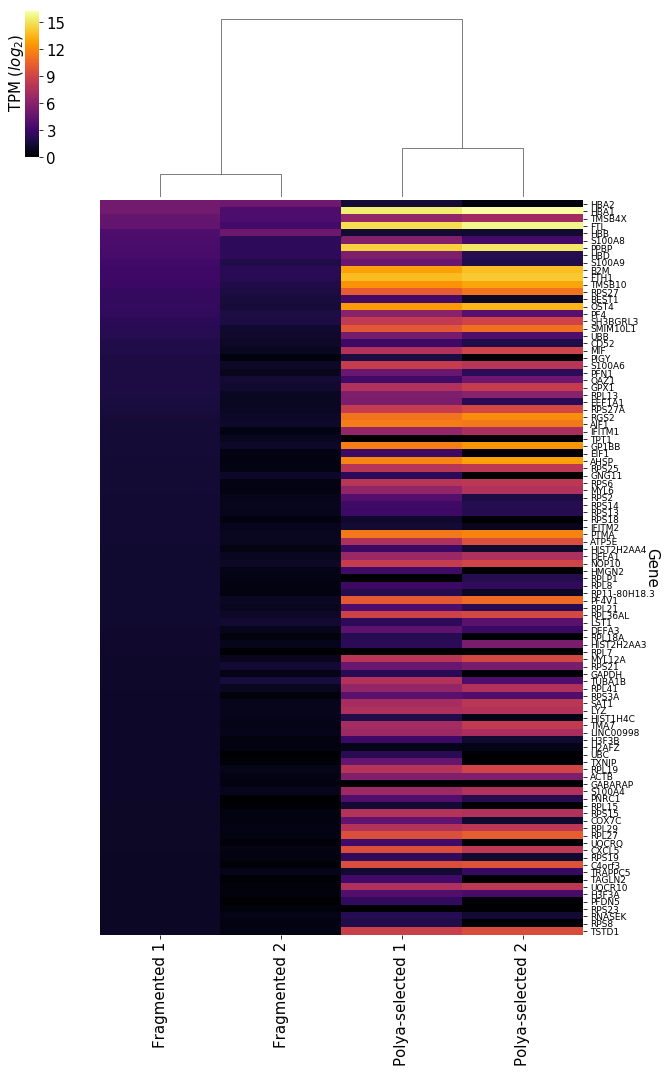

In [132]:
top_n = 100
p = sns.clustermap(np.log2(cor_df.sort_values('Fragmented 1', ascending=False).iloc[:top_n,-4:]+1),
                   row_cluster=False,
                  figsize = (10,17),
                  cmap = 'inferno')
ax = p.ax_heatmap
yt = ax.set_yticks(np.arange(top_n)+0.5)
xt = ax.set_xticks(np.arange(4) + 0.5)
xt = ax.set_xticklabels(cor_df.columns[-4:].str.capitalize()[p.dendrogram_col.reordered_ind])
yt = ax.set_yticklabels(cor_df.index[:top_n], fontsize=9)
ax.set_ylabel('Gene', rotation = 270)
p.fig.text(0.1,0.85, r'TPM ($log_2$)', rotation = 90, fontsize=15)

Text(0.1,0.85,'TPM ($log_2$)')

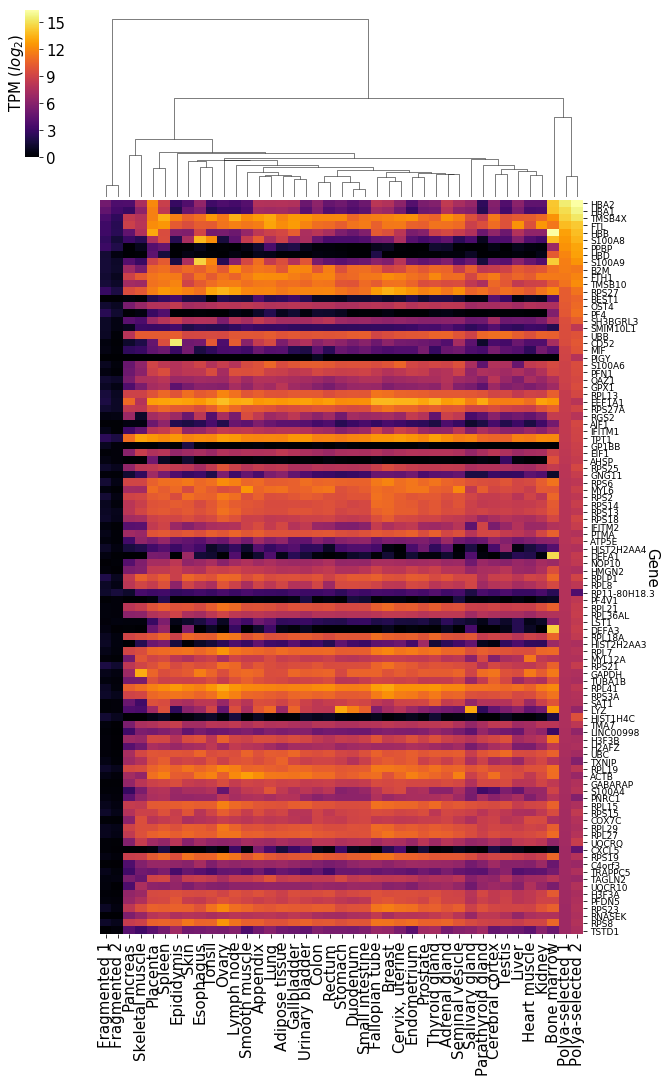

In [123]:
top_n = 100
p = sns.clustermap(np.log2(cor_df.iloc[:top_n,2:]+1),
                   row_cluster=False,
                  figsize = (10,17),
                  cmap = 'inferno')
ax = p.ax_heatmap
xt = ax.set_yticks(np.arange(top_n)+0.5)
yt = ax.set_xticks(np.arange(cor_df.shape[1] - 2) + 0.5)
xt = ax.set_xticklabels(cor_df.columns[2:].str.capitalize()[p.dendrogram_col.reordered_ind])
yt = ax.set_yticklabels(cor_df.index[:top_n], fontsize=9)
ax.set_ylabel('Gene', rotation = 270)
p.fig.text(0.1,0.85, r'TPM ($log_2$)', rotation = 90, fontsize=15)

In [ ]:
cor_df

In [124]:
tpm_df.head()

,id,grouped_type,type,name,200FQ_1_S4_R1_001,Qcf_Frag1_R1_001,Qcf_Frag2_R1_001,Qcf_L1_R1_001,Qcf_L2_R1_001,glength
3,ENSG00000000003,Protein coding,protein_coding,TSPAN6,0.0,0.000000,0.000000,0.000000,0.000000,11321
4,ENSG00000000003,Protein coding,protein_coding,TSPAN6,0.0,26.243767,18.492080,1.112297,0.229823,11321
5,ENSG00000000005,Protein coding,protein_coding,TNMD,0.0,0.000000,0.000000,0.000000,0.000000,15083
6,ENSG00000000005,Protein coding,protein_coding,TNMD,0.0,10.744391,15.421986,0.278289,0.345001,15083
7,ENSG00000000419,Protein coding,protein_coding,DPM1,9.0,0.000000,0.000000,0.000000,0.000000,23688


Text(0.9,0.5,'TPM ($log_2$)')

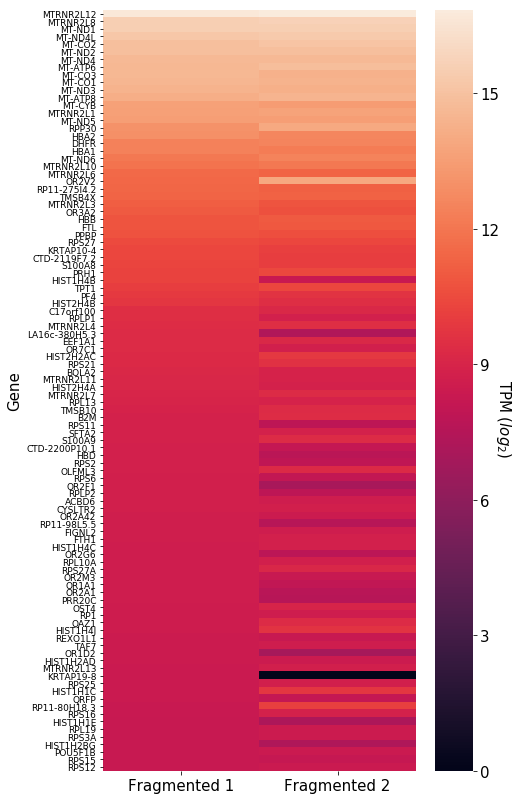

In [125]:
fig = plt.figure(figsize=(7,14))
ax = plt.subplot(111)
frag_df = tpm_df\
    .filter(regex='id|name|type|Frag')\
    .sort_values('Qcf_Frag1_R1_001', ascending=False)\
    .set_index('name')
p = sns.heatmap(np.log2(frag_df.iloc[:top_n,-2:]+1), ax =ax)
xt = ax.set_yticks(np.arange(top_n)+0.5)
yt = ax.set_xticks(np.arange(2) + 0.5)
xt = ax.set_xticklabels(frag_df.columns[-2:].map(rename_longRNA))
yt = ax.set_yticklabels(frag_df.index[:top_n], fontsize=9)
ax.set_ylabel('Gene', rotation = 90)
fig.text(0.9,0.5, r'TPM ($log_2$)', rotation = 270, fontsize=15)

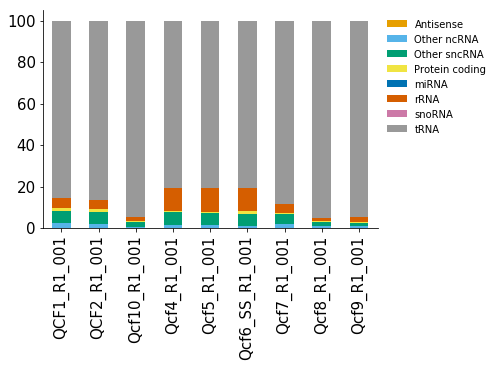

In [126]:
ax = plt.subplot(111)
count_df.filter(regex='grou|Q[cC][Ff][0-9]+')\
    .groupby('grouped_type')\
    .sum() \
    .pipe(percentage_columns)\
    .transpose() \
    .plot.bar(stacked=True, ax = ax, color = colors)
ax.legend(bbox_to_anchor = (1,1), frameon = False)
sns.despine()

In [127]:
dedup_df = pd.read_table('/stor/work/Lambowitz/cdw2854/cell_Free_nucleotides/tgirt_map/Counts/all_counts/spreaded_all_counts.tsv')
dedup_df.head()

,gene_id,gene_name,gene_type,grouped_type,200FN_1_S3_R1_001:all:antisense,200FN_1_S3_R1_001:all:sense,200FN_1_S3_R1_001:dedup:antisense,200FN_1_S3_R1_001:dedup:sense,200FQ_1_S4_R1_001:all:antisense,200FQ_1_S4_R1_001:all:sense,...,Qcf_Na1_R1_001:dedup:antisense,Qcf_Na1_R1_001:dedup:sense,S96-cfD_R1_001:all:antisense,S96-cfD_R1_001:all:sense,S96-cfD_R1_001:dedup:antisense,S96-cfD_R1_001:dedup:sense,S96-cf_R1_001:all:antisense,S96-cf_R1_001:all:sense,S96-cf_R1_001:dedup:antisense,S96-cf_R1_001:dedup:sense
0,18S_rRNA,18S_rRNA,rDNA,rDNA,1789,1253493,1408,867335,2500,1591132,...,901,1880,575,105388,359,46970,945,113126,583,48893
1,28S_rRNA,28S_rRNA,rDNA,rDNA,1795,2636287,1447,1692392,2133,2677238,...,1422,4006,1006,277376,597,109543,1340,296715,787,113377
2,5.8S_rRNA,5.8S_rRNA,rDNA,rDNA,135,116389,110,44882,127,111788,...,101,294,67,362407,32,15992,74,386566,34,16284
3,5S_rRNA,5S_rRNA,rDNA,rDNA,27,48855,21,18586,79,162867,...,65,157,6,3413,5,1355,6,3607,5,1393
4,Alu,SINE:AluJb,Repeats,Repeats,197,209,169,169,403,787,...,39517,47502,3022,2676,1727,1418,3315,3042,1865,1632


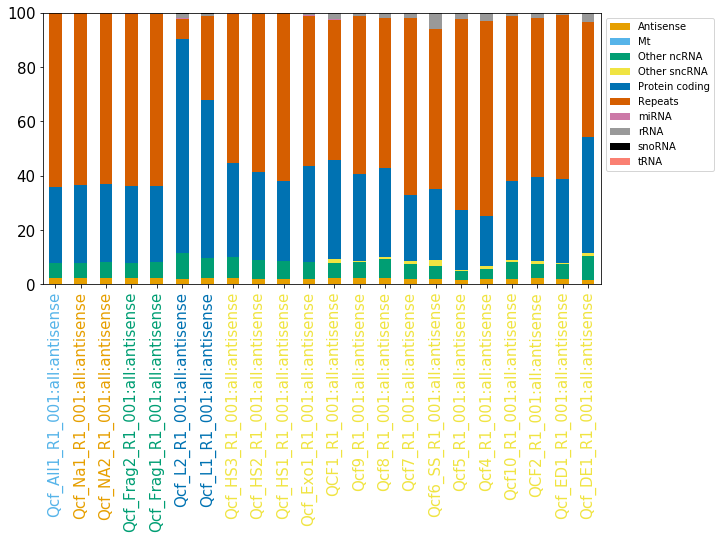

In [128]:
from tgirt_map.table_tool import change_gene_type
from sequencing_tools.viz_tools import color_encoder, simpsons_palette

def label_treatment(x, return_label=False):
    if 'All' in x:
        return 'Total nucleic acid' if return_label else 1
    elif re.search('NA|Na', x):
        return 'Alkaline hydrolysis' if return_label else 2
    elif re.search('Frag|frag', x):
        return 'Fragmented' if return_label else 3
    elif re.search('L[12]', x):
        return 'PolyA-selected' if return_label else 4
    else:
        return 'DNase-treatment' if return_label else 5

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
colors.append('salmon')
dedup_df\
    .assign(gene_type = lambda d: d.gene_type.map(change_gene_type))\
    .filter(regex = 'type|Qcf|QCF')\
    .assign(grouped_type = lambda d: np.where(d.grouped_type == "rDNA", 'rRNA', d.grouped_type))\
    .groupby('grouped_type')\
    .sum() \
    .pipe(lambda d: d[d.columns[d.columns.str.contains('anti')]])\
    .pipe(lambda d: d[d.columns[~d.columns.str.contains('dedup')]])\
    .pipe(percentage_columns)\
    .transpose() \
    .assign(prep = lambda d: d.index.map(label_treatment))\
    .sort_values('prep')\
    .drop('prep', axis=1)\
    .plot.bar(stacked=True, ax = ax, color = colors)
ax.legend(bbox_to_anchor = (1,1))

preps = [label_treatment(_.get_text(), return_label=True) for _ in ax.get_xmajorticklabels()]
ce = color_encoder()
ce.fit(preps)
for _, pre in zip(ax.get_xmajorticklabels(),preps):
    _.set_color(ce.encoder[pre])

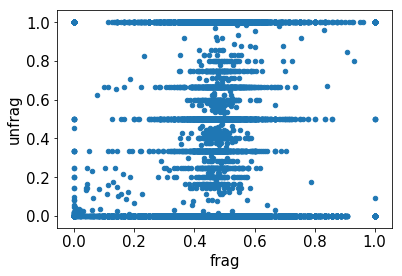

In [96]:
def frac(x, y):
    return x/(x+y)

sense_df = dedup_df\
    .filter(regex = 'Frag1.*dedup|QCF1_.*dedup|type|name|id')  \
    .assign(frag = lambda d: frac(d['Qcf_Frag1_R1_001:dedup:antisense'], d['Qcf_Frag1_R1_001:dedup:sense'])) \
    .assign(unfrag = lambda d: frac(d['QCF1_R1_001:dedup:antisense'],d['QCF1_R1_001:dedup:sense']))  \
    .query('grouped_type != "Repeats"') \
    .replace([np.inf, -np.inf], np.nan)\
    .fillna(0)
sense_df.plot.scatter('frag','unfrag')

In [100]:
sense_df.query('frag > unfrag').sort_values('frag', ascending=False).pipe(lambda d: d[d['QCF1_R1_001:dedup:antisense']>10])

,gene_id,gene_name,gene_type,grouped_type,QCF1_R1_001:dedup:antisense,QCF1_R1_001:dedup:sense,Qcf_Frag1_R1_001:dedup:antisense,Qcf_Frag1_R1_001:dedup:sense,frag,unfrag
12470,ENSG00000167995,BEST1,protein_coding,Protein coding,11,2,59,6,0.907692,0.846154
3117,ENSG00000104904,OAZ1,protein_coding,Protein coding,209,103,196,37,0.841202,0.669872
30271,ENSG00000230021,RP5-857K21.4,lincRNA,Other ncRNA,157,741,1254,338,0.787688,0.174833
27963,ENSG00000226745,RP11-115D7.3,pseudogene,Other ncRNA,12,9,4,2,0.666667,0.571429
18298,ENSG00000198727,MT-CYB,protein_coding,Protein coding,12,39,226,488,0.316527,0.235294
0,18S_rRNA,18S_rRNA,rDNA,rDNA,208,85491,1858,663189,0.002794,0.002427
1,28S_rRNA,28S_rRNA,rDNA,rDNA,299,175916,1808,1063269,0.001698,0.001697
42394,ENSG00000252316,RNY4,misc_RNA,Other sncRNA,65,76826,16,14547,0.001099,0.000845


In [142]:
count_df\
    .filter(regex='L[12]|Frag[12]|id|name') \
    .sort_values('Qcf_Frag1_R1_001', ascending=False)\
    .iloc[20:70,:]

,id,name,Qcf_Frag1_R1_001,Qcf_Frag2_R1_001,Qcf_L1_R1_001,Qcf_L2_R1_001
123808,MT-TE,MT-TE,11018.0,25910.0,395.0,161.0
124165,TRU-TCA1-1,TRU-TCA1-1,8668.0,52744.0,360.0,74.0
106518,ENSG00000265150.1,RN7SL2,8598.0,11630.0,20.0,27.0
123945,TRG-GCC5-1,TRG-GCC5-1,8457.0,45667.0,198.0,31.0
122431,ENSG00000283029.1_4,RN7SL1,8065.0,10180.0,23.0,34.0
123818,MT-TP,MT-TP,7488.0,11591.0,184.0,62.0
124185,TRV-CAC10-1,TRV-CAC10-1,7357.0,56969.0,168.0,43.0
59713,ENSG00000228716.6_3,DHFR,5879.0,7485.0,1336.0,2350.0
123938,TRG-CCC8-1,TRG-CCC8-1,5593.0,35829.0,192.0,41.0
123815,MT-TL2,MT-TL2,5592.0,34178.0,351.0,104.0


In [101]:
tpm_df\
    .filter(regex='id|name|type|Frag')\
    .sort_values('Qcf_Frag1_R1_001', ascending=False)\
    .set_index('name')

,id,grouped_type,type,Qcf_Frag1_R1_001,Qcf_Frag2_R1_001
name,,,,,
TSPAN6,ENSG00000000003,Protein coding,protein_coding,NaN,NaN
TNMD,ENSG00000000005,Protein coding,protein_coding,NaN,NaN
DPM1,ENSG00000000419,Protein coding,protein_coding,NaN,NaN
SCYL3,ENSG00000000457,Protein coding,protein_coding,NaN,NaN
C1orf112,ENSG00000000460,Protein coding,protein_coding,NaN,NaN
FGR,ENSG00000000938,Protein coding,protein_coding,NaN,NaN
CFH,ENSG00000000971,Protein coding,protein_coding,NaN,NaN
FUCA2,ENSG00000001036,Protein coding,protein_coding,NaN,NaN
GCLC,ENSG00000001084,Protein coding,protein_coding,NaN,NaN
